## Dataset

The NuInsSeg dataset contains more than 30k manually segmented nuclei from 31 human and mouse organs and 665 image patches extracted from H&E-stained whole slide images.

### Acknowledgement

https://www.kaggle.com/datasets/ipateam/nuinsseg

In [1]:
import pickle
import glob
from keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from skimage import io
import random
import numpy as np

load_model = pickle.load(open('XG_model.sav', 'rb'))

In [2]:
img_path=glob.glob('./Images/*')
mask_path=glob.glob('./Masks/*')

model = VGG19(weights='imagenet', include_top=False, input_shape=(512,512,3))
for layer in model.layers:
    layer.trainable = False
    
VGG19_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)

In [3]:
num=random.randint(0,len(img_path))
I=io.imread(img_path[num])/255.
M=io.imread(mask_path[num],as_gray=True)/255

In [4]:
test_img = np.expand_dims(I, axis=0)
feature = VGG19_model.predict(test_img)
test_feature = feature.reshape(-1, feature.shape[3])

prediction = load_model.predict(test_feature)
predicted_image = prediction.reshape(M.shape)


IoU Score: 0.7257492612916843


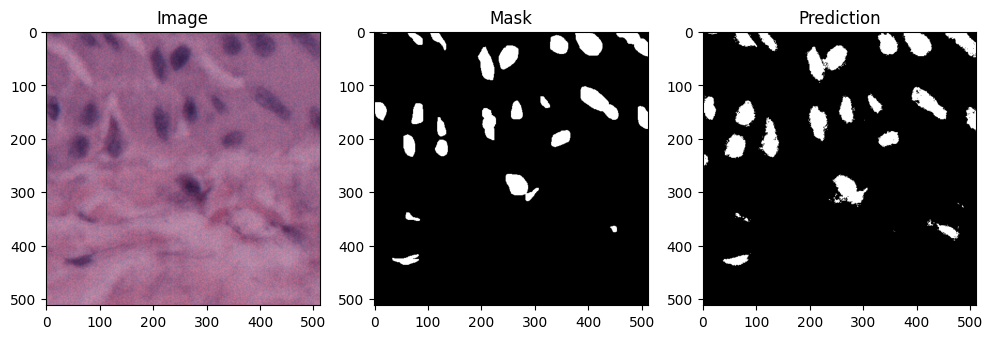

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(I)
plt.title('Image')
plt.subplot(132)
plt.imshow(M,cmap='gray')
plt.title('Mask')
plt.subplot(133)
plt.imshow(predicted_image,cmap='gray')
plt.title('Prediction')

Int = np.logical_and(M, predicted_image)
iou = np.sum(Int) / ((np.sum(M)+np.sum(predicted_image))- np.sum(Int))
print('IoU Score: %s' % iou)